# Tourist satisfaction with transport systems to Mount Etna, Sicily. Part 2. Classification.

# This cell will prompt you to connect this notebook with your google account.
from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Academy/+ Papers/en_proceso/mount_etna/'


In [1]:
base_dir = '/mnt/g/My Drive/Academy/+ Papers/en_proceso/mount_etna/' # To run locally

# 1. Data pre-processing

In [2]:
#!pip install pycaret[full]

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import imblearn

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('Libraries read!')

Libraries read!


## Reading data

In [4]:
lda_title_data_tuned = pd.read_csv(base_dir + 'data/cable/lda_title_data_tuned.csv')
lda_review_data_tuned = pd.read_csv(base_dir + 'data/cable/lda_review_data_tuned.csv')

# 5. Classification model

### Merging data

In [5]:
lda_title_data_tuned.head(15)

,Title_title,Title_sentiment_rating,Title_Topic_0,Title_Topic_1,Title_Dominant_Topic,Title_Perc_Dominant_Topic
0,hard,0,0.736887,0.263113,Topic_0,0.74
1,cost cable car top,0,0.206992,0.793008,Topic_1,0.79
2,orgainise easy access,0,0.865052,0.134948,Topic_0,0.87
3,cheap easy way,0,0.578780,0.421220,Topic_0,0.58
4,question cable car child,0,0.104014,0.895986,Topic_1,0.90
5,cable car,0,0.167053,0.832947,Topic_1,0.83
6,NaN,0,0.500000,0.500000,Topic_0,0.50
7,NaN,0,0.500000,0.500000,Topic_0,0.50
8,NaN,0,0.500000,0.500000,Topic_0,0.50
9,earre rule take coat,0,0.104415,0.895585,Topic_1,0.90


In [6]:
lda_review_data_tuned.head(15)

,Review_content,Review_sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,arrive make_sure allow plenty road long think ...,0,0.051614,0.948386,Topic_1,0.95
1,much cost charge really look receipt entry blo...,0,0.152423,0.847577,Topic_1,0.85
2,small child august use company sight however o...,0,0.120671,0.879329,Topic_1,0.88
3,able spend money research plenty euro leave re...,0,0.045210,0.954790,Topic_1,0.95
4,year_old month old know child young buggy thank,0,0.693708,0.306292,Topic_0,0.69
5,follow unheard deduction price ast convenient ...,0,0.009858,0.990142,Topic_1,0.99
6,etna adult child age feel spend money lift jee...,0,0.173636,0.826364,Topic_1,0.83
7,stay half hour parking place choose early morn...,0,0.170793,0.829207,Topic_1,0.83
8,want holiday southern hire incidentally gp dif...,0,0.052690,0.947310,Topic_1,0.95
9,beloved chat various thing evening mention ups...,0,0.030122,0.969878,Topic_1,0.97


In [7]:
data = pd.concat([lda_title_data_tuned.drop(columns=['Title_sentiment_rating'], axis=1), lda_review_data_tuned], axis=1)
data = data.rename(columns={'Review_sentiment_rating': 'sentiment_rating'})
data = data.dropna(subset=['Title_title' ,'Review_content']).reset_index(drop=True)
data.head(15)

,Title_title,Title_Topic_0,Title_Topic_1,Title_Dominant_Topic,Title_Perc_Dominant_Topic,Review_content,sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,hard,0.736887,0.263113,Topic_0,0.74,arrive make_sure allow plenty road long think ...,0,0.051614,0.948386,Topic_1,0.95
1,cost cable car top,0.206992,0.793008,Topic_1,0.79,much cost charge really look receipt entry blo...,0,0.152423,0.847577,Topic_1,0.85
2,orgainise easy access,0.865052,0.134948,Topic_0,0.87,small child august use company sight however o...,0,0.120671,0.879329,Topic_1,0.88
3,cheap easy way,0.578780,0.421220,Topic_0,0.58,able spend money research plenty euro leave re...,0,0.045210,0.954790,Topic_1,0.95
4,question cable car child,0.104014,0.895986,Topic_1,0.90,year_old month old know child young buggy thank,0,0.693708,0.306292,Topic_0,0.69
5,cable car,0.167053,0.832947,Topic_1,0.83,follow unheard deduction price ast convenient ...,0,0.009858,0.990142,Topic_1,0.99
6,earre rule take coat,0.104415,0.895585,Topic_1,0.90,beloved chat various thing evening mention ups...,0,0.030122,0.969878,Topic_1,0.97
7,tour cheap good,0.368972,0.631028,Topic_1,0.63,least different company people alone end plump...,0,0.740323,0.259677,Topic_0,0.74
8,go,0.250529,0.749471,Topic_1,0.75,review site imply ascend complicate reasonably...,0,0.214815,0.785185,Topic_1,0.79
9,great gimmick,0.173376,0.826624,Topic_1,0.83,reviewer offer pay small fortune ride dirty ra...,1,0.015057,0.984943,Topic_1,0.98


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title_title                 1135 non-null   object 
 1   Title_Topic_0               1135 non-null   float64
 2   Title_Topic_1               1135 non-null   float64
 3   Title_Dominant_Topic        1135 non-null   object 
 4   Title_Perc_Dominant_Topic   1135 non-null   float64
 5   Review_content              1135 non-null   object 
 6   sentiment_rating            1135 non-null   int64  
 7   Review_Topic_0              1135 non-null   float64
 8   Review_Topic_1              1135 non-null   float64
 9   Review_Dominant_Topic       1135 non-null   object 
 10  Review_Perc_Dominant_Topic  1135 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 97.7+ KB


In [9]:
from pycaret.classification import *

without_pca = setup(data = data, 
            target = 'sentiment_rating',
            session_id = 42,
            normalize = True,
            #normalize_method = 'minmax',
            transformation = True,
            #pca = True,
            ignore_features=['Title_title', 'Review_content', 'Title_Dominant_Topic', 'Title_Perc_Dominant_Topic', 
                             'Review_Dominant_Topic', 'Review_Perc_Dominant_Topic'],
            use_gpu = True,
            fix_imbalance=True,
            fix_imbalance_method=imblearn.over_sampling.SVMSMOTE(),
            data_split_stratify = True,
            fold_strategy = 'stratifiedkfold',
            silent = True,
            log_experiment = True,
            experiment_name = 'No pca, oversampling with SVMSMOTE'
           )

,Description,Value
0,session_id,42
1,Target,sentiment_rating
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1135, 11)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


eda(display_format = 'bokeh')

In [10]:
best_models = compare_models(turbo=False, exclude=['gpc', 'mlp', 'svm', 'ridge'], sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7606,0.6118,0.3156,0.1855,0.2323,0.1026,0.1080,0.0580
ada,Ada Boost Classifier,0.7581,0.6242,0.2944,0.1827,0.2128,0.0845,0.0938,0.3390
nb,Naive Bayes,0.7669,0.6212,0.2844,0.1648,0.2057,0.0820,0.0870,0.0600
lda,Linear Discriminant Analysis,0.7833,0.6215,0.2522,0.1721,0.2027,0.0864,0.0873,0.0580
lr,Logistic Regression,0.7858,0.6207,0.2411,0.1759,0.2002,0.0853,0.0855,0.0670
rbfsvm,SVM - Radial Kernel,0.7831,0.5783,0.2200,0.1418,0.1698,0.0661,0.0674,0.3000
knn,K Neighbors Classifier,0.7305,0.4895,0.2089,0.1107,0.1441,-0.0009,0.0010,0.6420
gbc,Gradient Boosting Classifier,0.7846,0.5755,0.2067,0.1701,0.1814,0.0621,0.0638,0.3660
dt,Decision Tree Classifier,0.7405,0.4983,0.1833,0.1106,0.1359,-0.0044,-0.0045,0.0610
lightgbm,Light Gradient Boosting Machine,0.7683,0.5159,0.1744,0.1134,0.1365,0.0098,0.0103,39.6030


!mlflow ui

## SVM - Radial Kernel

In [11]:
# Best ML analysis
rbfsvm = create_model(estimator = 'rbfsvm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8875,0.7089,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7875,0.5102,0.2222,0.1667,0.1905,0.0710,0.0720
2,0.8750,0.5714,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8000,0.5271,0.2000,0.2000,0.2000,0.0857,0.0857
4,0.7342,0.6190,0.2222,0.1250,0.1600,0.0166,0.0176
5,0.7342,0.6270,0.3333,0.1667,0.2222,0.0829,0.0902
6,0.8228,0.6635,0.3333,0.2727,0.3000,0.1997,0.2010
7,0.7975,0.6730,0.4444,0.2667,0.3333,0.2226,0.2327
8,0.6456,0.3429,0.2222,0.0870,0.1250,-0.0464,-0.0544
9,0.7468,0.5397,0.2222,0.1333,0.1667,0.0283,0.0296


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


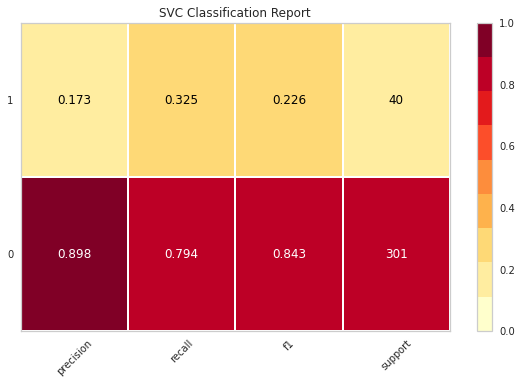

In [12]:
# Plotting the classification report
plot_model(estimator = rbfsvm, plot = 'class_report')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


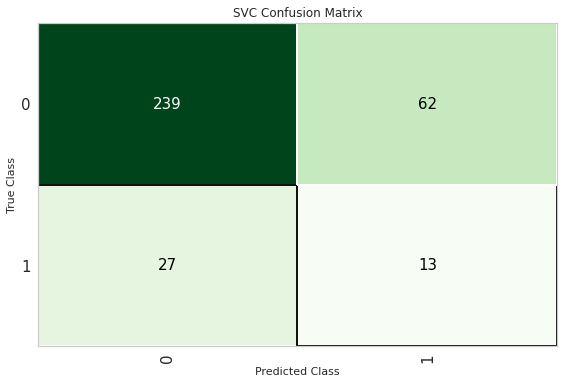

In [13]:
# Plotting the confusion matrix
plot_model(estimator = rbfsvm, plot = 'confusion_matrix')

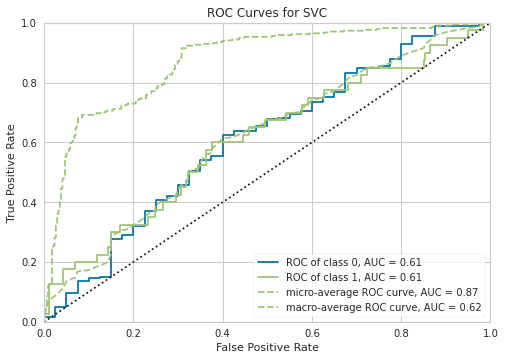

In [14]:
# Plotting the AUC
plot_model(estimator = rbfsvm, plot = 'auc')

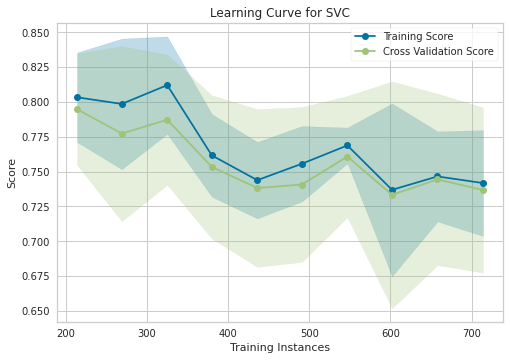

In [15]:
# Plotting the learning curve
plot_model(estimator = rbfsvm, plot = 'learning' )

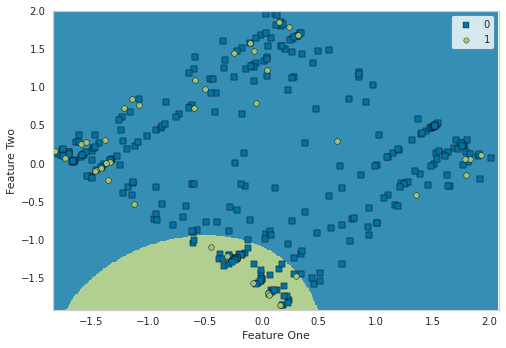

In [16]:
plot_model(estimator = rbfsvm, plot='boundary')

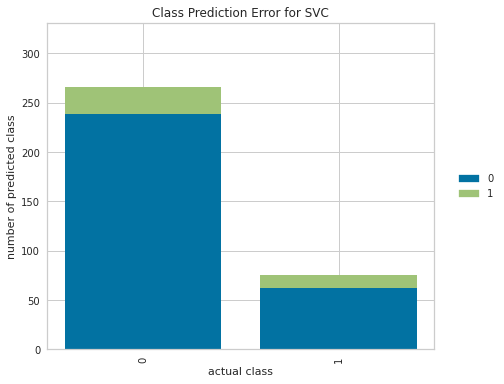

In [17]:
plot_model(estimator = rbfsvm, plot = 'error')

In [18]:
evaluate_model(estimator = rbfsvm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: rbfsvm

In [19]:
# tune hyperparameters to optimize AUC
tuned_rbfsvm = tune_model(rbfsvm, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5875,0.5884,0.6667,0.1667,0.2667,0.1057,0.1551
1,0.6250,0.5305,0.4444,0.1379,0.2105,0.0469,0.0607
2,0.6250,0.5643,0.6000,0.1875,0.2857,0.1176,0.1543
3,0.7125,0.5343,0.5000,0.2174,0.3030,0.1560,0.1775
4,0.6835,0.5587,0.2222,0.1000,0.1379,-0.0228,-0.0255
5,0.6203,0.6079,0.5556,0.1613,0.2500,0.0892,0.1198
6,0.7089,0.7317,0.7778,0.2500,0.3784,0.2489,0.3173
7,0.7089,0.6984,0.6667,0.2308,0.3429,0.2090,0.2576
8,0.5696,0.3794,0.2222,0.0690,0.1053,-0.0831,-0.1078
9,0.6203,0.5095,0.3333,0.1111,0.1667,-0.0051,-0.0064


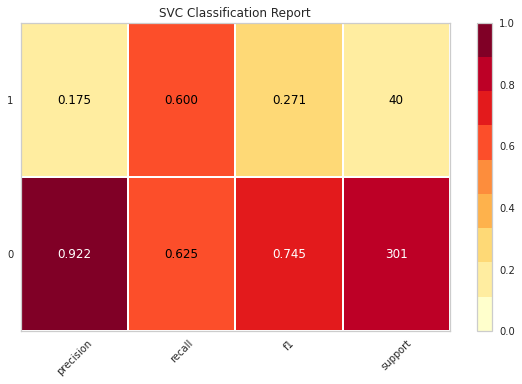

In [20]:
# Plotting the classification report
plot_model(estimator = tuned_rbfsvm, plot = 'class_report')

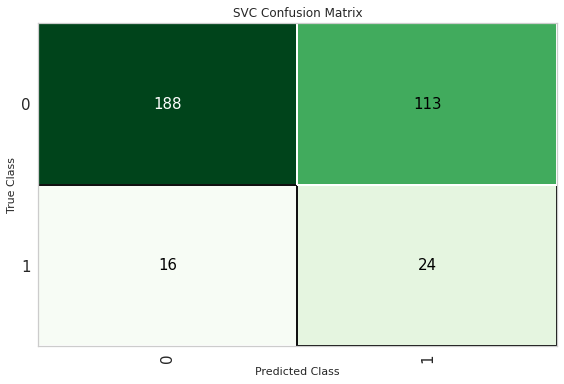

In [21]:
# Plotting the confusion matrix
plot_model(estimator = tuned_rbfsvm, plot = 'confusion_matrix')

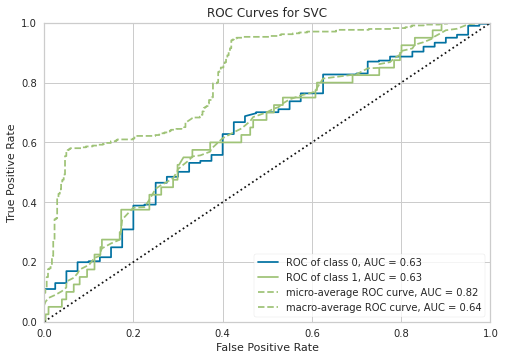

In [22]:
# Plotting the AUC
plot_model(estimator = tuned_rbfsvm, plot = 'auc')

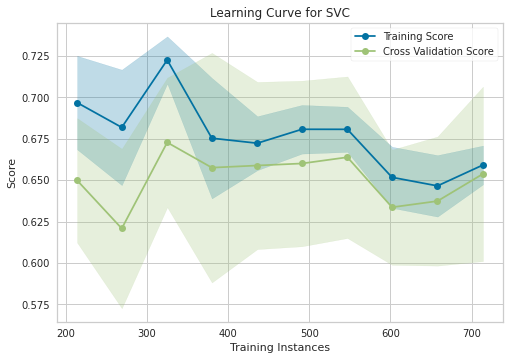

In [23]:
# Plotting the learning curve
plot_model(estimator = tuned_rbfsvm, plot = 'learning' )

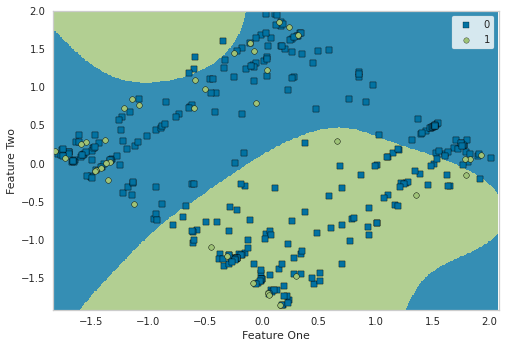

In [24]:
plot_model(estimator = tuned_rbfsvm, plot='boundary')

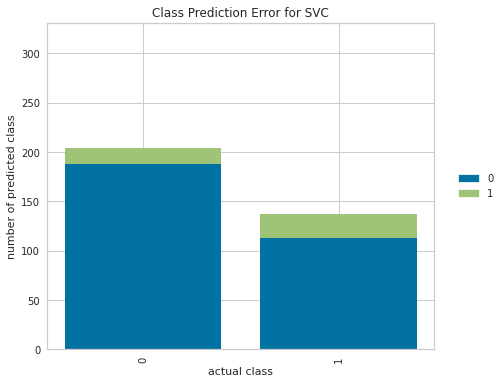

In [25]:
plot_model(estimator = tuned_rbfsvm, plot = 'error')

In [26]:
evaluate_model(estimator = tuned_rbfsvm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Decision Tree

In [27]:
# Best ML analysis
dt = create_model(estimator = 'dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,0.7355,0.5556,0.4545,0.5000,0.4294,0.4322
1,0.7500,0.4710,0.1111,0.0769,0.0909,-0.0485,-0.0496
2,0.6875,0.4786,0.2000,0.1053,0.1379,-0.0309,-0.0333
3,0.7250,0.5429,0.3000,0.1667,0.2143,0.0638,0.0679
4,0.7595,0.4286,0.0000,0.0000,0.0000,-0.1363,-0.1365
5,0.6835,0.5310,0.3333,0.1364,0.1935,0.0380,0.0439
6,0.7089,0.4968,0.2222,0.1111,0.1481,-0.0044,-0.0048
7,0.7468,0.4214,0.0000,0.0000,0.0000,-0.1433,-0.1442
8,0.7848,0.4429,0.0000,0.0000,0.0000,-0.1201,-0.1204
9,0.6835,0.4341,0.1111,0.0556,0.0741,-0.0918,-0.0998


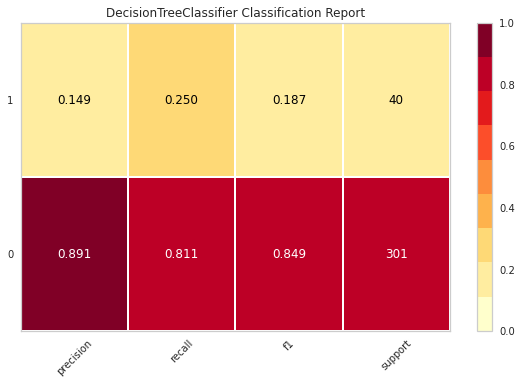

In [28]:
# Plotting the classification report
plot_model(estimator = dt, plot = 'class_report')

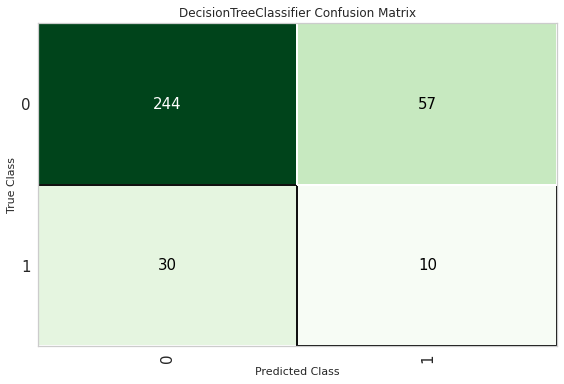

In [29]:
# Plotting the confusion matrix
plot_model(estimator = dt, plot = 'confusion_matrix')

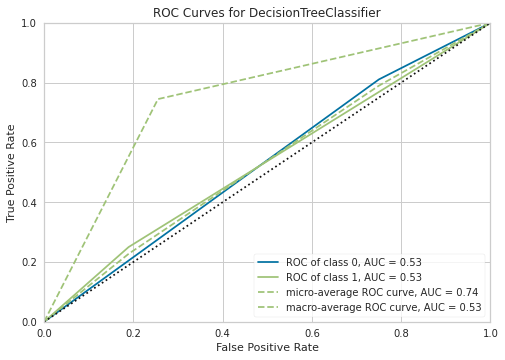

In [30]:
# Plotting the AUC
plot_model(estimator = dt, plot = 'auc')

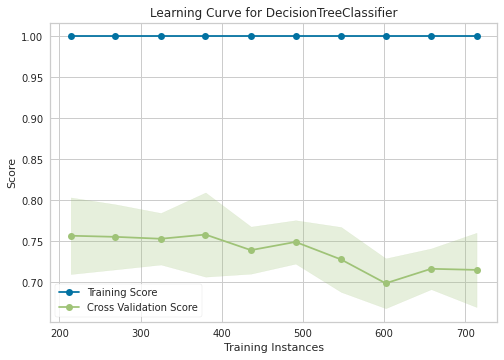

In [31]:
# Plotting the learning curve
plot_model(estimator = dt, plot = 'learning' )

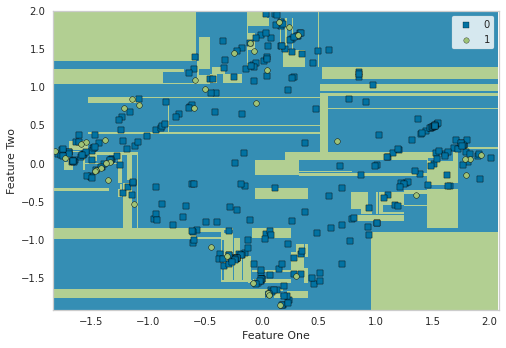

In [32]:
plot_model(estimator = dt, plot='boundary')

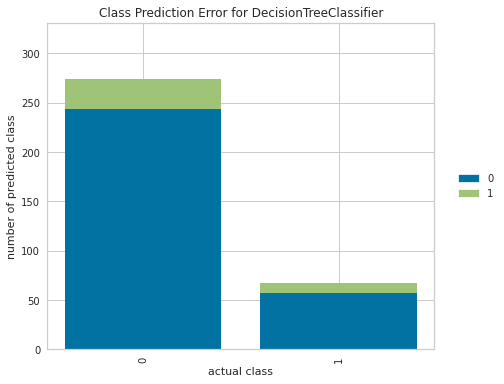

In [33]:
plot_model(estimator = dt, plot = 'error')

In [34]:
evaluate_model(estimator = dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: dt

In [35]:
# tune hyperparameters to optimize AUC
tuned_dt = tune_model(dt, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8875,0.6948,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5125,0.4710,0.4444,0.1053,0.1702,-0.0143,-0.0218
2,0.8750,0.6136,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8500,0.6229,0.2000,0.3333,0.2500,0.1724,0.1794
4,0.6835,0.6214,0.6667,0.2143,0.3243,0.1835,0.2341
5,0.5823,0.6865,0.7778,0.1842,0.2979,0.1393,0.2130
6,0.7089,0.7563,0.7778,0.2500,0.3784,0.2489,0.3173
7,0.7089,0.6563,0.6667,0.2308,0.3429,0.2090,0.2576
8,0.5949,0.4651,0.3333,0.1034,0.1579,-0.0194,-0.0251
9,0.5443,0.4817,0.4444,0.1143,0.1818,0.0007,0.0010


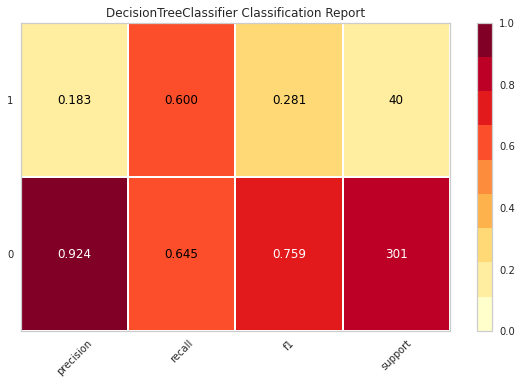

In [36]:
# Plotting the classification report
plot_model(estimator = tuned_dt, plot = 'class_report')

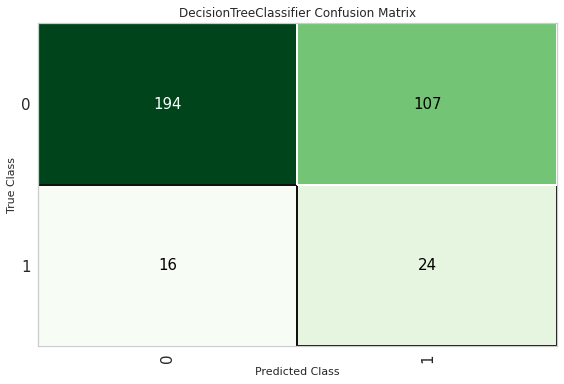

In [37]:
# Plotting the confusion matrix
plot_model(estimator = tuned_dt, plot = 'confusion_matrix')

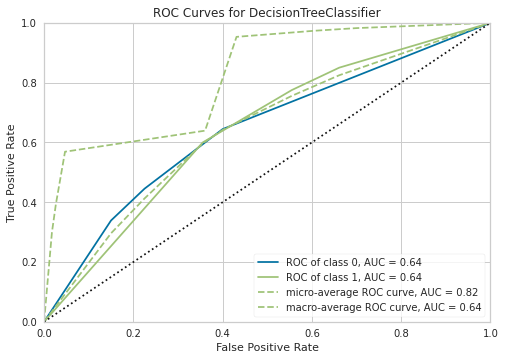

In [38]:
# Plotting the AUC
plot_model(estimator = tuned_dt, plot = 'auc')

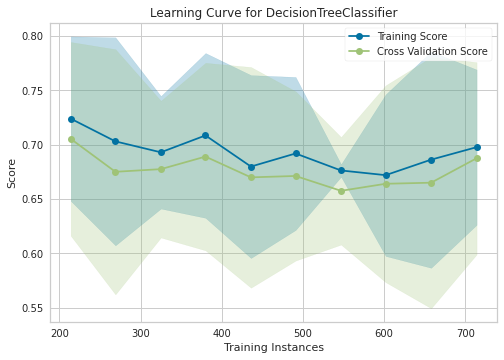

In [39]:
# Plotting the learning curve
plot_model(estimator = tuned_dt, plot = 'learning' )

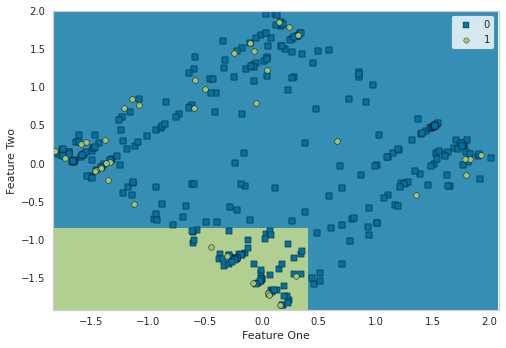

In [40]:
plot_model(estimator = tuned_dt, plot='boundary')

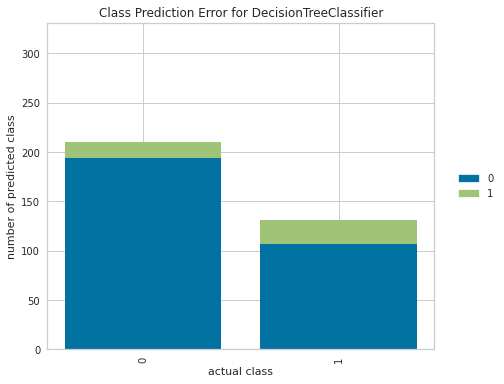

In [41]:
plot_model(estimator = tuned_dt, plot = 'error')

In [42]:
evaluate_model(estimator = tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Naive Bayes

In [43]:
# Best ML analysis
nb = create_model(estimator = 'nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8250,0.6479,0.1111,0.1429,0.1250,0.0295,0.0298
1,0.7625,0.5352,0.1111,0.0833,0.0952,-0.0383,-0.0388
2,0.8125,0.5600,0.0000,0.0000,0.0000,-0.0909,-0.0976
3,0.7750,0.6771,0.4000,0.2500,0.3077,0.1818,0.1890
4,0.7722,0.6921,0.5556,0.2632,0.3571,0.2396,0.2643
5,0.7089,0.6603,0.3333,0.1500,0.2069,0.0590,0.0661
6,0.7975,0.6984,0.4444,0.2667,0.3333,0.2226,0.2327
7,0.7975,0.6778,0.4444,0.2667,0.3333,0.2226,0.2327
8,0.6835,0.4889,0.2222,0.1000,0.1379,-0.0228,-0.0255
9,0.7342,0.5746,0.2222,0.1250,0.1600,0.0166,0.0176


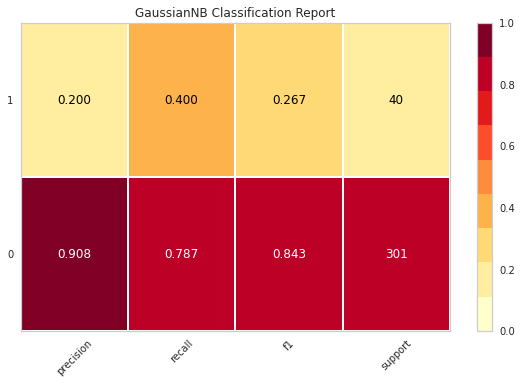

In [44]:
# Plotting the classification report
plot_model(estimator = nb, plot = 'class_report')

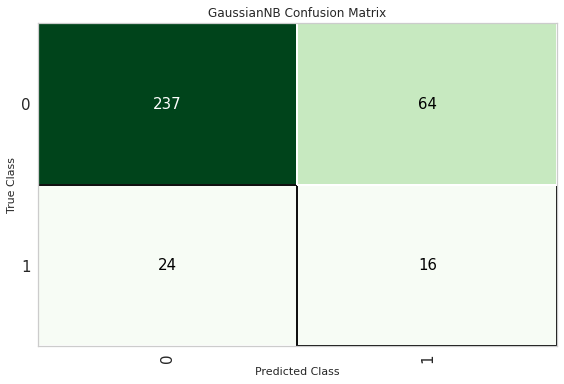

In [45]:
# Plotting the confusion matrix
plot_model(estimator = nb, plot = 'confusion_matrix')

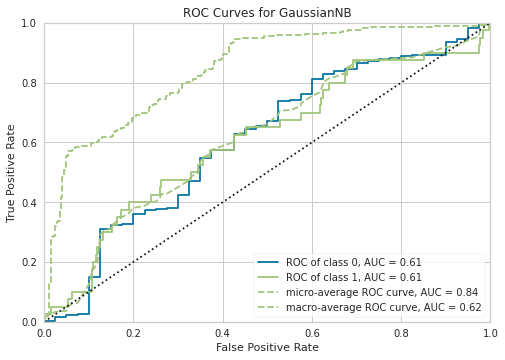

In [46]:
# Plotting the AUC
plot_model(estimator = nb, plot = 'auc')

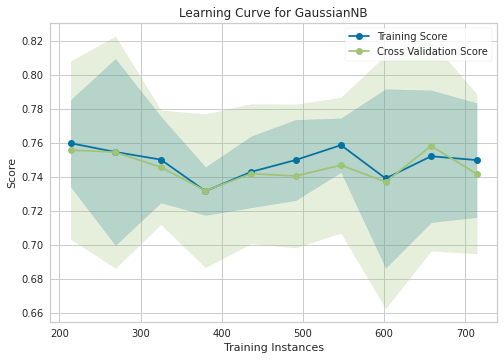

In [47]:
# Plotting the learning curve
plot_model(estimator = nb, plot = 'learning' )

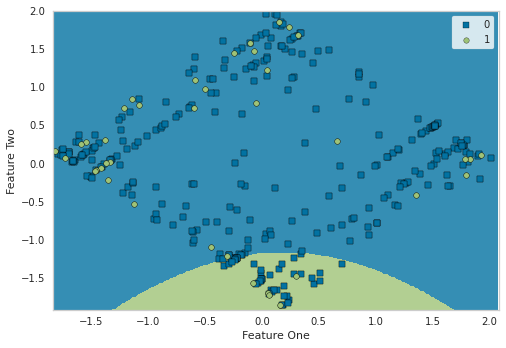

In [48]:
plot_model(estimator = nb, plot='boundary')

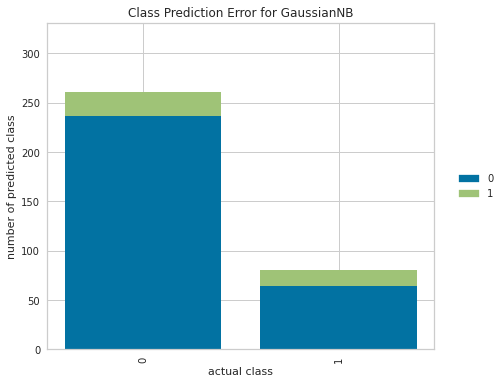

In [49]:
plot_model(estimator = nb, plot = 'error')

In [50]:
evaluate_model(estimator = nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: nb

In [51]:
# tune hyperparameters to optimize AUC
tuned_nb = tune_model(nb, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8250,0.6479,0.1111,0.1429,0.1250,0.0295,0.0298
1,0.7625,0.5352,0.1111,0.0833,0.0952,-0.0383,-0.0388
2,0.8125,0.5600,0.0000,0.0000,0.0000,-0.0909,-0.0976
3,0.7750,0.6771,0.4000,0.2500,0.3077,0.1818,0.1890
4,0.7722,0.6921,0.5556,0.2632,0.3571,0.2396,0.2643
5,0.7089,0.6603,0.3333,0.1500,0.2069,0.0590,0.0661
6,0.7975,0.6984,0.4444,0.2667,0.3333,0.2226,0.2327
7,0.7975,0.6778,0.4444,0.2667,0.3333,0.2226,0.2327
8,0.6835,0.4889,0.2222,0.1000,0.1379,-0.0228,-0.0255
9,0.7342,0.5746,0.2222,0.1250,0.1600,0.0166,0.0176


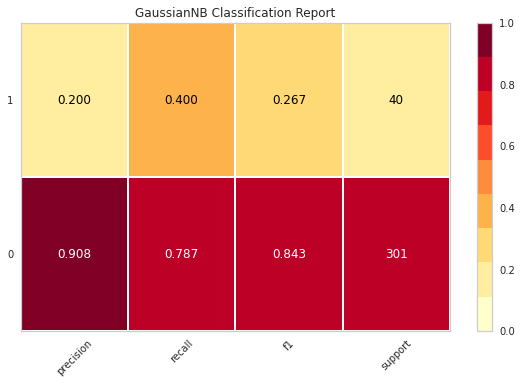

In [52]:
# Plotting the classification report
plot_model(estimator = tuned_nb, plot = 'class_report')

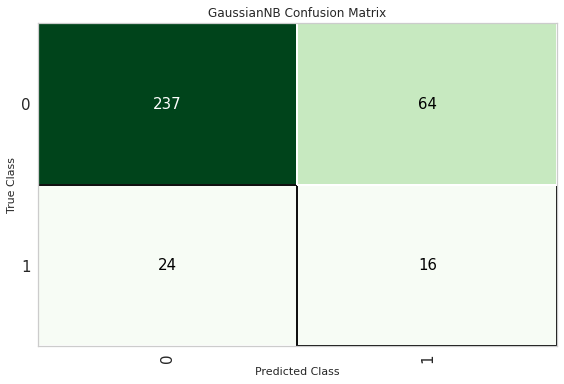

In [53]:
# Plotting the confusion matrix
plot_model(estimator = tuned_nb, plot = 'confusion_matrix')

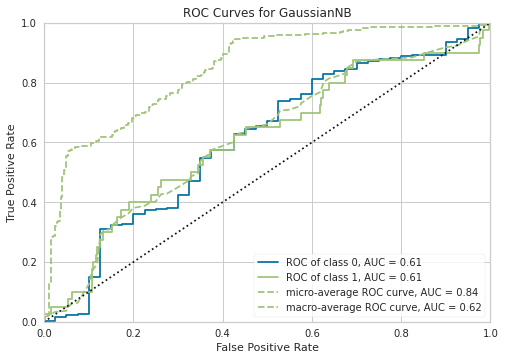

In [54]:
# Plotting the AUC
plot_model(estimator = tuned_nb, plot = 'auc')

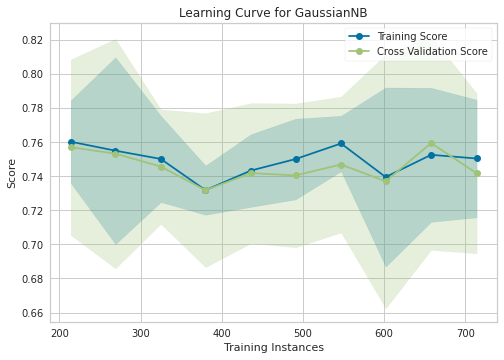

In [55]:
# Plotting the learning curve
plot_model(estimator = tuned_nb, plot = 'learning' )

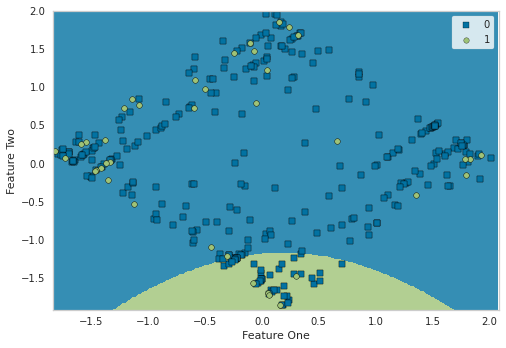

In [56]:
plot_model(estimator = tuned_nb, plot='boundary')

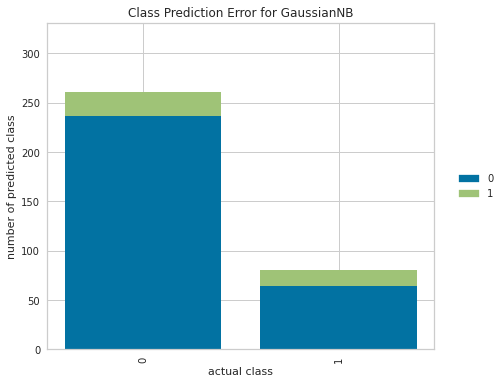

In [57]:
plot_model(estimator = tuned_nb, plot = 'error')

In [58]:
evaluate_model(estimator = tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Logistic Regression

In [59]:
# Best ML analysis
lr = create_model(estimator = 'lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8500,0.6510,0.2222,0.2857,0.2500,0.1681,0.1698
1,0.7875,0.5462,0.1111,0.1000,0.1053,-0.0149,-0.0150
2,0.8375,0.5643,0.0000,0.0000,0.0000,-0.0612,-0.0746
3,0.7750,0.6629,0.3000,0.2143,0.2500,0.1220,0.1243
4,0.8228,0.6857,0.4444,0.3077,0.3636,0.2646,0.2707
5,0.7342,0.6524,0.3333,0.1667,0.2222,0.0829,0.0902
6,0.8101,0.6841,0.3333,0.2500,0.2857,0.1788,0.1813
7,0.8228,0.6841,0.4444,0.3077,0.3636,0.2646,0.2707
8,0.6835,0.4937,0.1111,0.0556,0.0741,-0.0918,-0.0998
9,0.7342,0.5825,0.1111,0.0714,0.0870,-0.0601,-0.0621


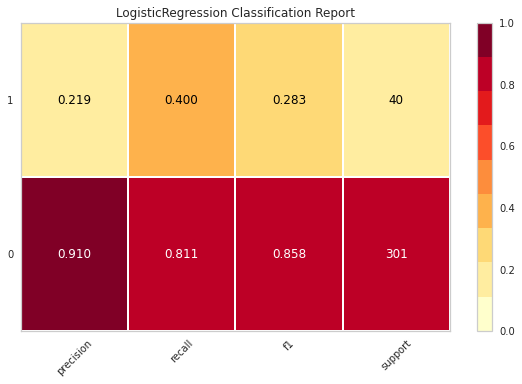

In [60]:
# Plotting the classification report
plot_model(estimator = lr, plot = 'class_report')

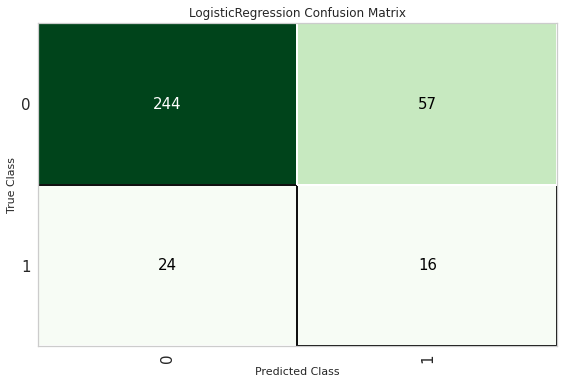

In [61]:
# Plotting the confusion matrix
plot_model(estimator = lr, plot = 'confusion_matrix')

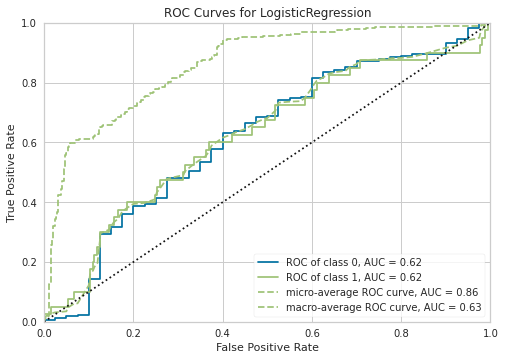

In [62]:
# Plotting the AUC
plot_model(estimator = lr, plot = 'auc')

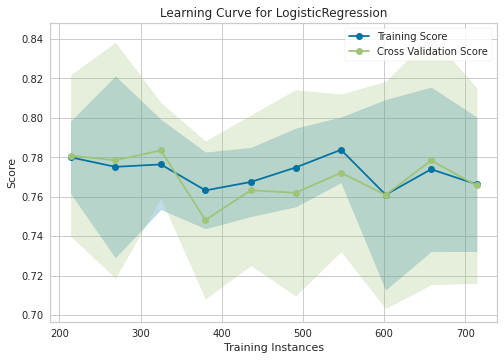

In [63]:
# Plotting the learning curve
plot_model(estimator = lr, plot = 'learning' )

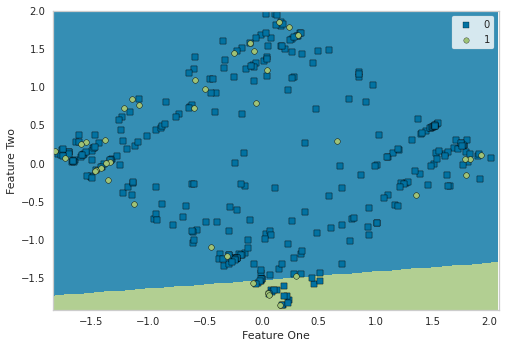

In [64]:
plot_model(estimator = lr, plot='boundary')

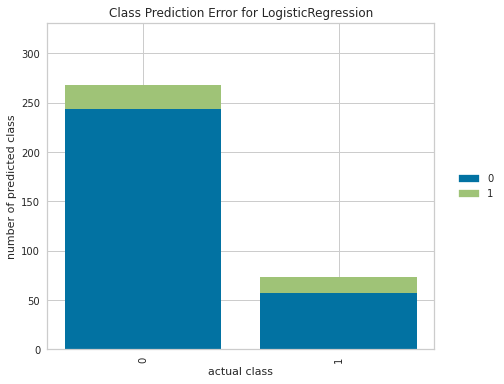

In [65]:
plot_model(estimator = lr, plot = 'error')

In [66]:
evaluate_model(estimator = lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: lr

In [67]:
# tune hyperparameters to optimize AUC
tuned_lr = tune_model(lr, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5500,0.6526,0.6667,0.1538,0.2500,0.0822,0.1276
1,0.5625,0.5477,0.4444,0.1176,0.1860,0.0099,0.0140
2,0.5375,0.5657,0.6000,0.1538,0.2449,0.0573,0.0851
3,0.7000,0.6629,0.5000,0.2083,0.2941,0.1429,0.1650
4,0.6709,0.6857,0.6667,0.2069,0.3158,0.1718,0.2229
5,0.5443,0.6524,0.6667,0.1538,0.2500,0.0796,0.1241
6,0.6835,0.6841,0.7778,0.2333,0.3590,0.2227,0.2941
7,0.7215,0.6857,0.6667,0.2400,0.3529,0.2227,0.2700
8,0.5443,0.4937,0.2222,0.0645,0.1000,-0.0930,-0.1250
9,0.6456,0.5841,0.4444,0.1481,0.2222,0.0619,0.0776


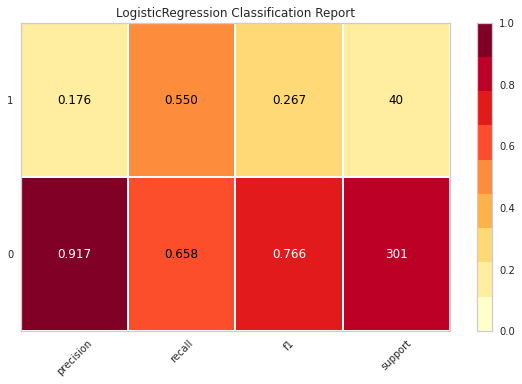

In [68]:
# Plotting the classification report
plot_model(estimator = tuned_lr, plot = 'class_report')

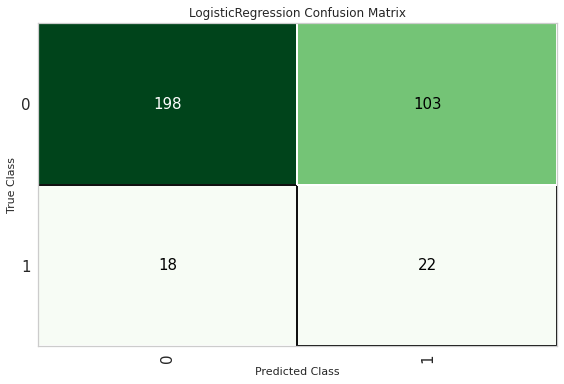

In [69]:
# Plotting the confusion matrix
plot_model(estimator = tuned_lr, plot = 'confusion_matrix')

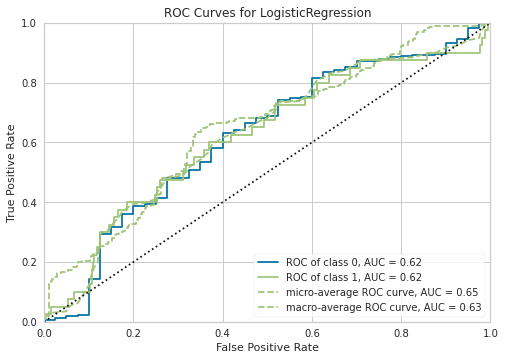

In [70]:
# Plotting the AUC
plot_model(estimator = tuned_lr, plot = 'auc')

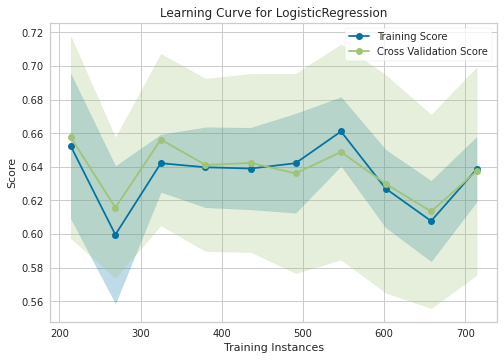

In [71]:
# Plotting the learning curve
plot_model(estimator = tuned_lr, plot = 'learning' )

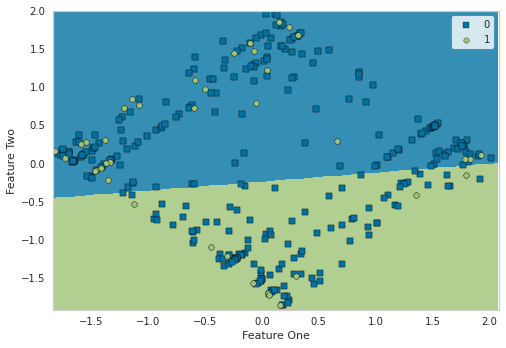

In [72]:
plot_model(estimator = tuned_lr, plot='boundary')

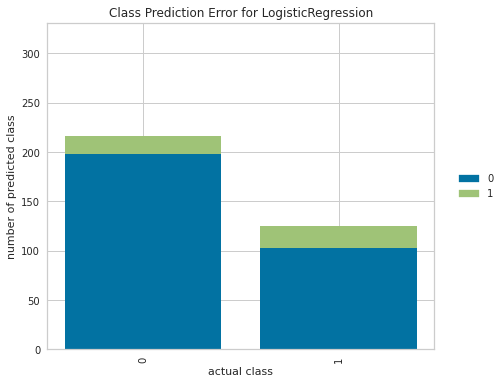

In [73]:
plot_model(estimator = tuned_lr, plot = 'error')

In [74]:
evaluate_model(estimator = tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Saving models

In [78]:
# finalize a model
final_tuned_dt = finalize_model(tuned_dt)

In [79]:
# save a model
save_model(final_tuned_dt, base_dir + 'models/cable/tuned_dt')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Title_title',
                                                        'Review_content',
                                                        'Title_Dominant_Topic',
                                                        'Title_Perc_Dominant_Topic',
                                                        'Review_Dominant_Topic',
                                                        'Review_Perc_Dominant_Topic'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='sentiment_rating',
                                       time...
                 ('dfs', 'passthrough'), ('pca', '

## Loading model

In [80]:
# Loading the saved model
tuned_dt_model = load_model(base_dir + 'models/cable/tuned_dt')
tuned_dt_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Title_title',
                                                       'Review_content',
                                                       'Title_Dominant_Topic',
                                                       'Title_Perc_Dominant_Topic',
                                                       'Review_Dominant_Topic',
                                                       'Review_Perc_Dominant_Topic'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='sentiment_rating',
                                      time...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
 